### Linear Regression Model Implementation 


In [1]:
### import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import fetch_california_housing


In [3]:
## creating the instance of the californai house pricing data 
california = fetch_california_housing()


In [4]:
### here is the description of the california  dataset 
california.DESCR


'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [5]:
### keys of the sklearn dataset
california.keys

<function Bunch.keys()>

In [6]:
### dependent featuree of the data
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [7]:
### target name of the dataset
california.target_names

['MedHouseVal']

In [8]:
### input features columns names 
input_features = california.feature_names


In [9]:
## here is the all data of the california okkay 
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

In [10]:
### load the input features in the dataframe 
dataset = pd.DataFrame(california.data,columns = input_features)

In [11]:
### here is input feature 
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
### adding the target feature of the california house pricing 
dataset['Price'] = pd.DataFrame(california.target)

In [13]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Observations 
1. Independent features are : MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'
2. Dependent feature is : Price 

### 1. Data Cleaning 

In [14]:
df = dataset

In [15]:
### these is no null values are present 
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [16]:
#### summary of the dataset 
df.info()
### data types are float so not warry about changing the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 2. EDA (Exploratory Data Analysis)

In [17]:
### descriptive summary of the dataset 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
#### understanding the correlation between the features 
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

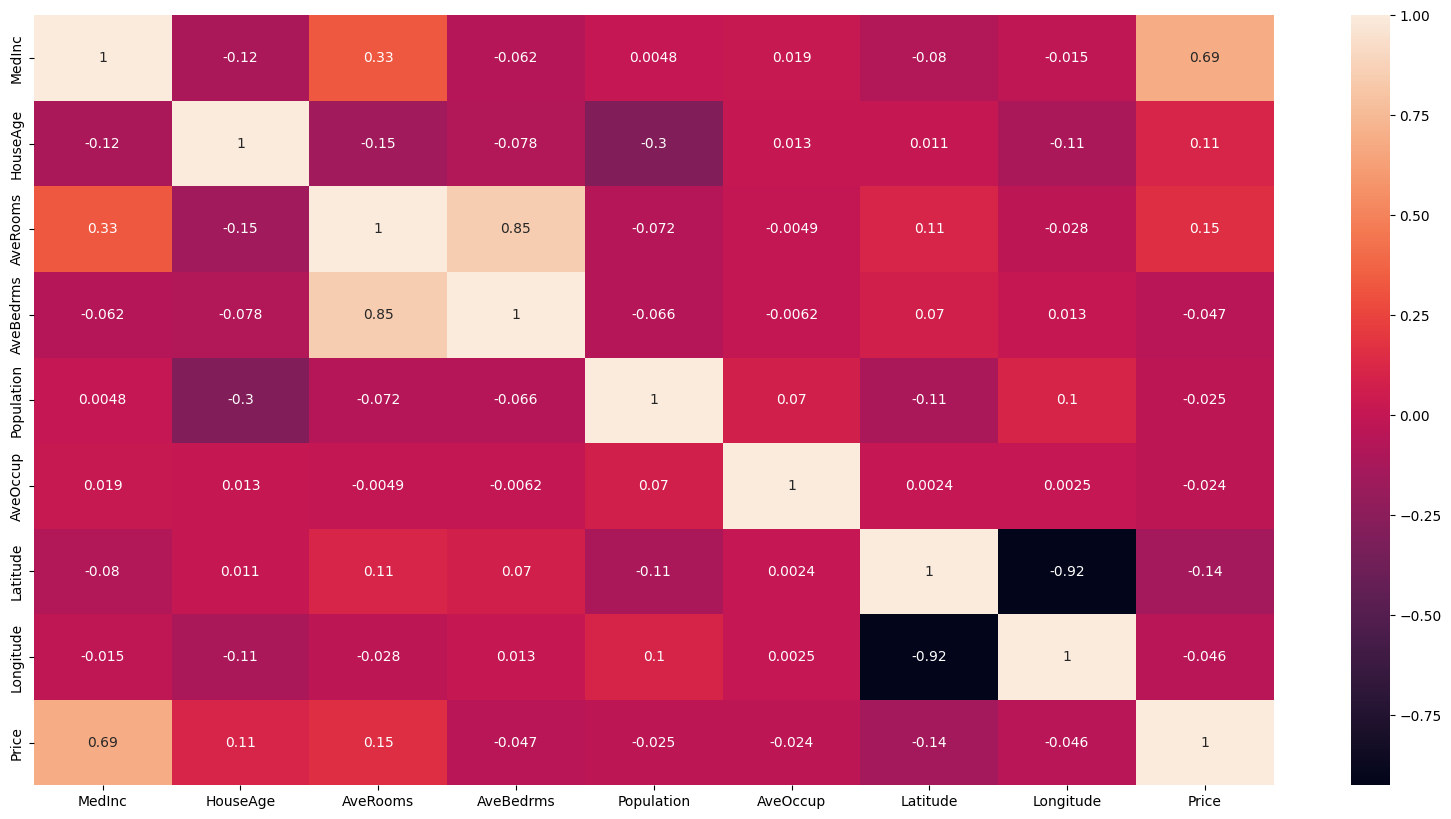

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

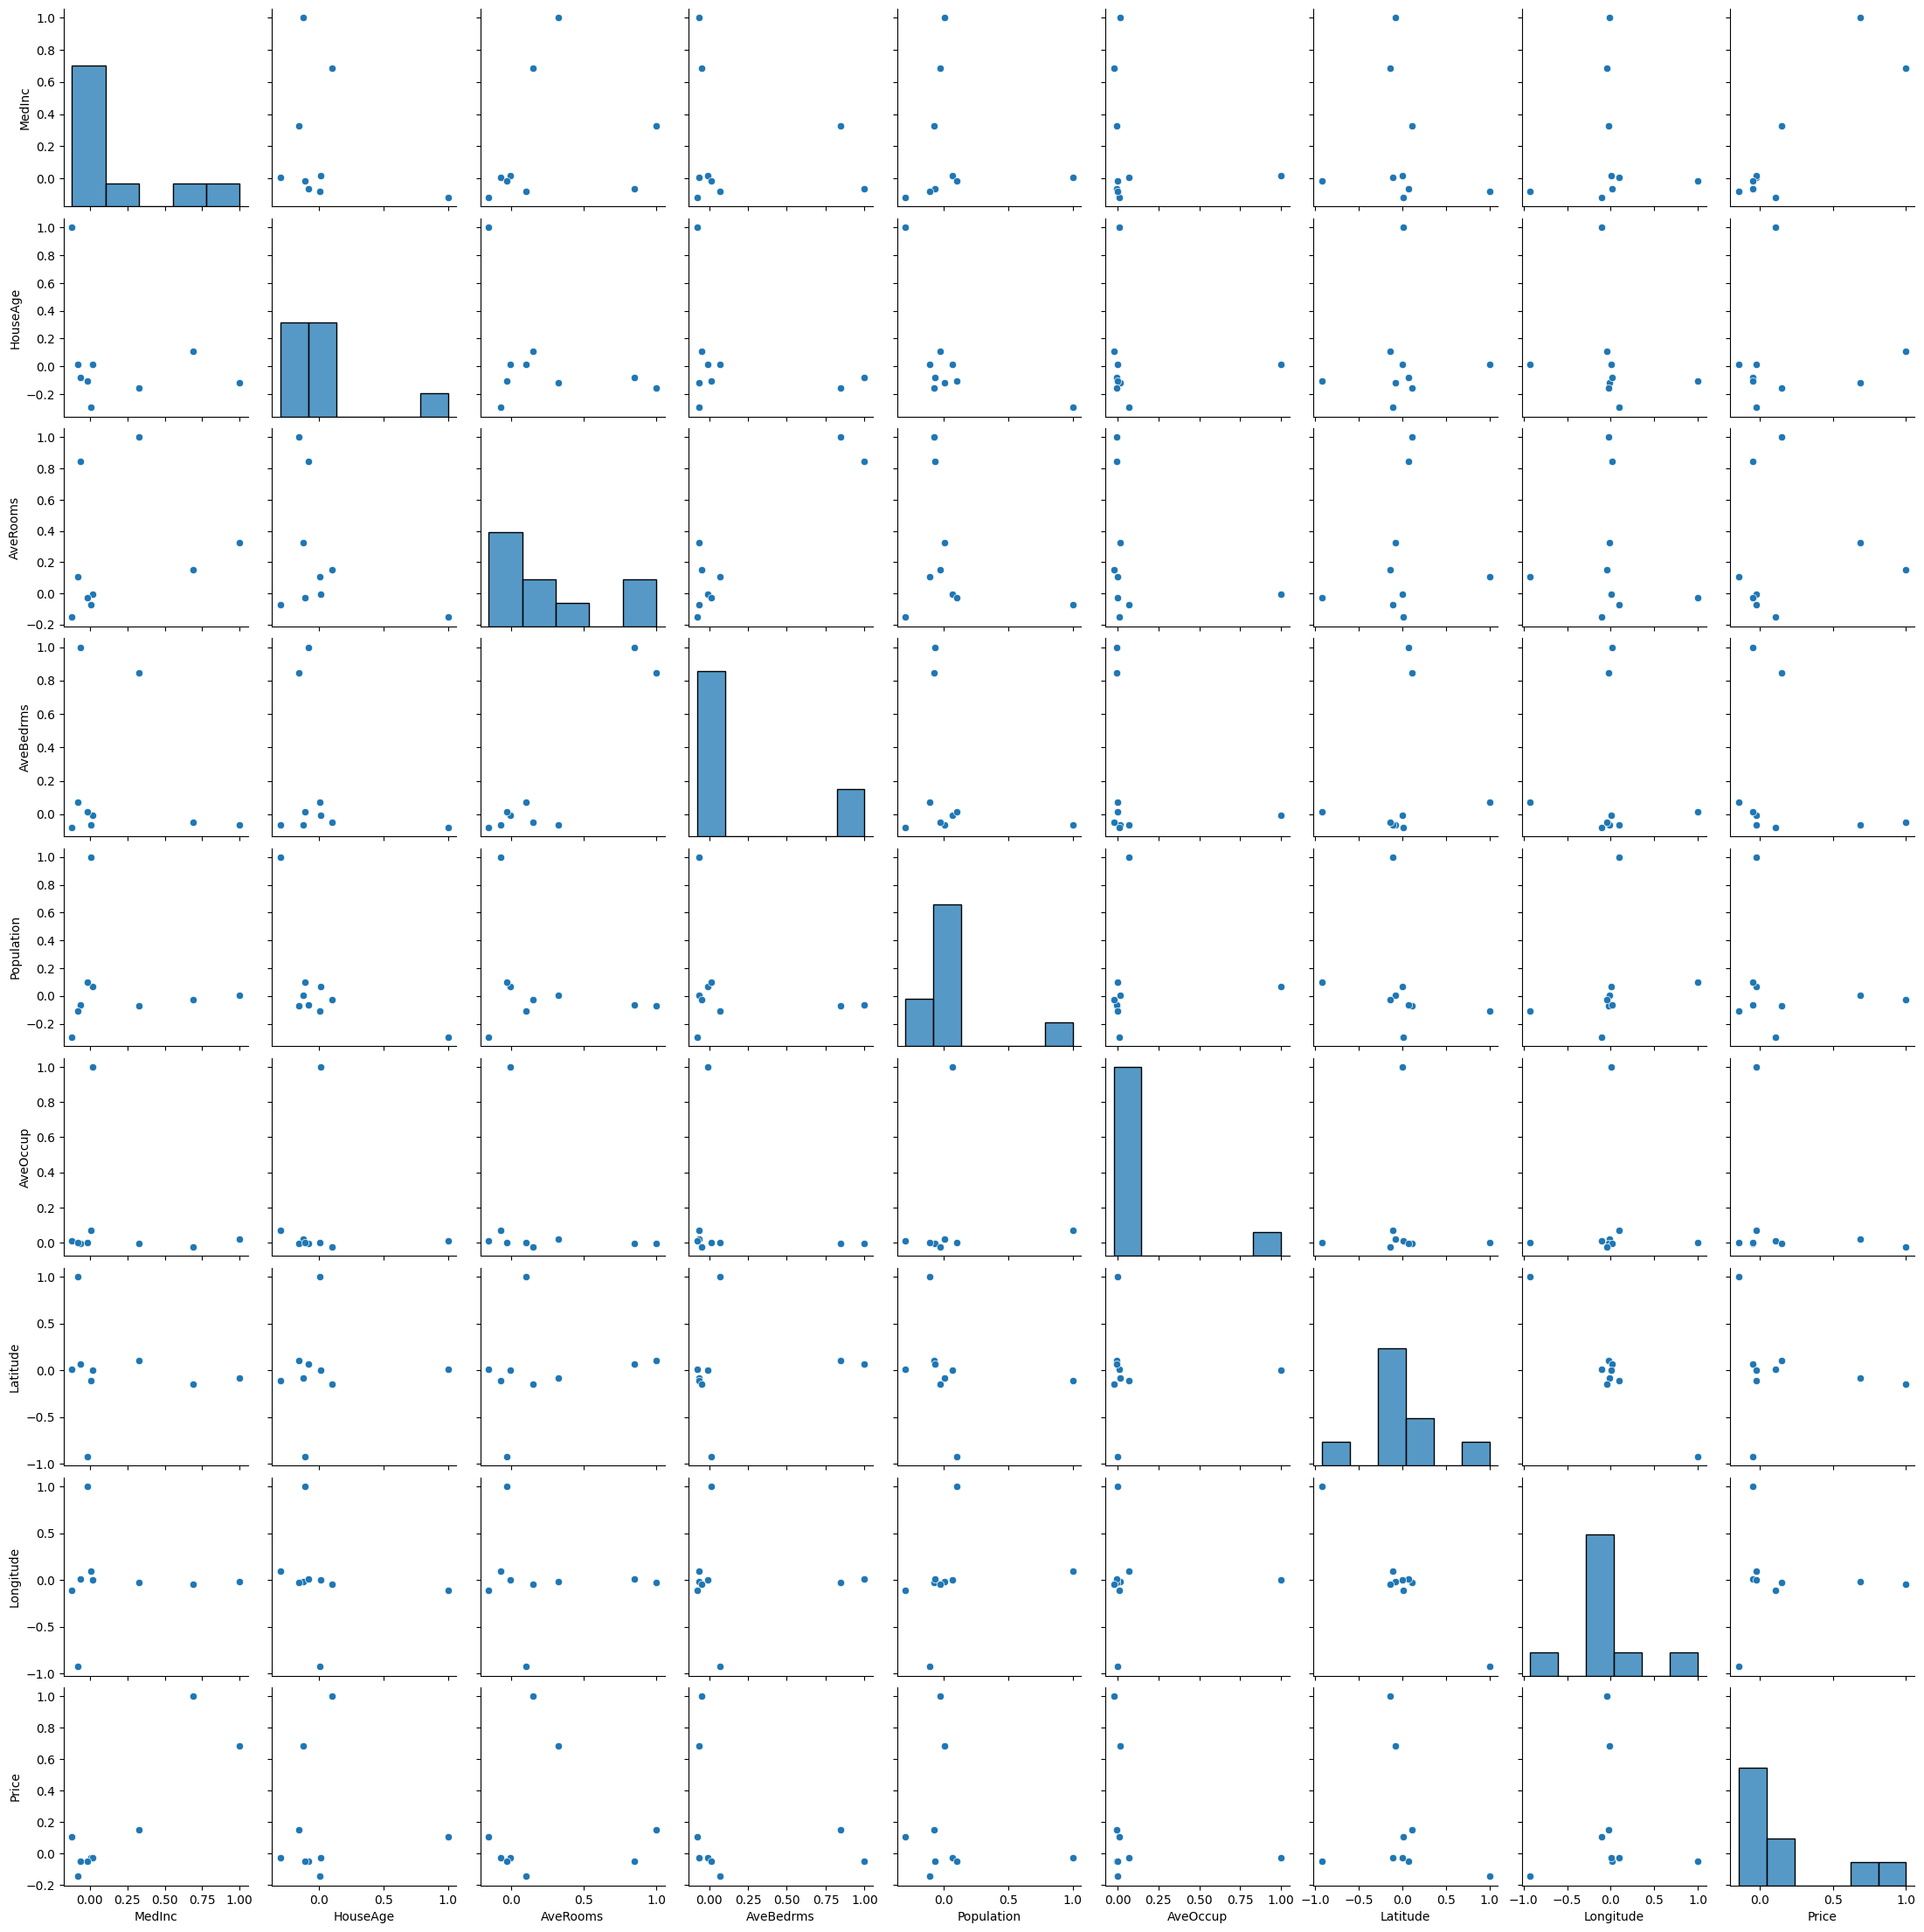

In [20]:
sns.pairplot(df.corr())

### Feature Engineering 

In [21]:
### split features based on dependent and independent features 
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((20640, 8), (20640,))

In [22]:
### split the train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=10)

In [23]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16750,2.4830,44.0,3.714286,1.040816,339.0,3.459184,37.71,-122.46
11962,2.7083,25.0,5.613293,1.105740,1311.0,3.960725,34.01,-117.40
758,3.8750,21.0,4.828215,1.120921,2461.0,2.361804,37.66,-122.07
17451,4.9292,17.0,6.802885,1.033654,1035.0,2.487981,34.71,-120.46
17018,6.8787,38.0,6.125203,0.980488,1455.0,2.365854,37.52,-122.29
...,...,...,...,...,...,...,...,...
9372,4.1250,37.0,5.109792,1.044510,648.0,1.922849,37.93,-122.53
7291,1.2059,18.0,2.537037,1.089744,1913.0,2.725071,33.98,-118.22
17728,5.5336,6.0,4.905336,0.965577,2160.0,3.717728,37.32,-121.79
7293,2.2059,35.0,2.748491,0.997988,2160.0,4.346076,33.98,-118.23


In [24]:
### Standardization of the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
#### fit and the transform the input features and avoid data leakage 
x_train_scaled =scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)

In [26]:
x_train_scaled.shape,x_test_scaled.shape

((13828, 8), (6812, 8))

### Train the Model 


##### Using Linear Regression

In [27]:
### import the linearregression and create the instance 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [28]:
### train the model 
regressor.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
### model prediction for the training data 
y_pred_train = regressor.predict(x_train_scaled)

In [30]:
regressor.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [31]:
regressor.intercept_

np.float64(2.0634768086491158)

### best fit line 
y_prediction_train = 2.0634768086491158 +  0.82872299(w1)+  0.1231163(w2) + -0.27068752(w3) + 0.32859106(w4) + 0.00213572(w5)+ -0.02810091(w6)+ -0.93017985(w7) -0.89505497(w8) 



#### Performance Metrics for linear regression model


In [32]:
### import the metrics functionalities for the performance metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [33]:
mse = mean_squared_error(y_train,y_pred_train) ### mse for training data 
mae = mean_absolute_error(y_train,y_pred_train) ### mae for the training data
rmse = np.sqrt(mse) ### rmse
score = r2_score(y_train,y_pred_train)

In [34]:
print("mean squared error is : ",mse)
print("mean absolute error is : ",mae)
print("root mean squared error is : ",rmse)
print("r2 score is  : ",score)

mean squared error is :  0.5131000770553342
mean absolute error is :  0.5272495380857499
root mean squared error is :  0.7163100425481512
r2 score is  :  0.6107081709724276


## Assumptions 

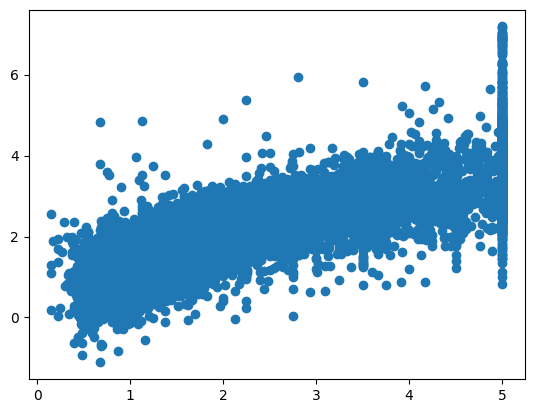

In [35]:
# relationship between the actual points and model predicted points 
plt.scatter(y_train,y_pred_train)   ### can be considerable
## It's look's like a linear relations 

In [36]:
### residuals error 
residuals = y_train - y_pred_train

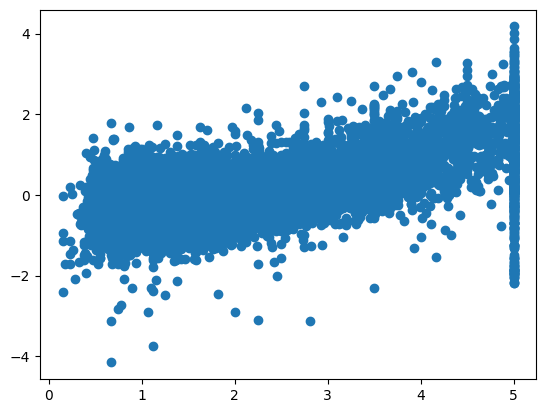

In [37]:
plt.scatter(y_train,residuals)  #### fine

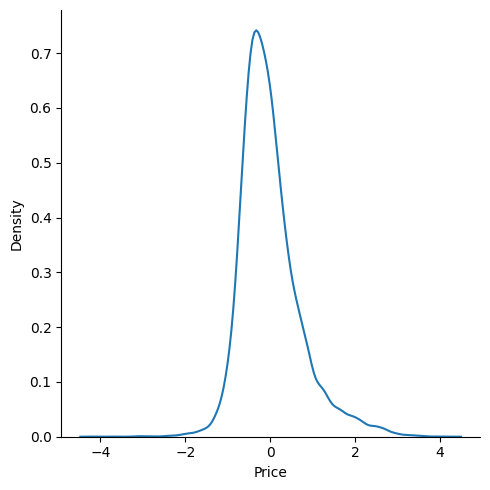

In [38]:
sns.displot(residuals,kind='kde')  ### good 

#### Train with the test data 

In [39]:
y_pred_test = regressor.predict(x_test_scaled)

### Performance metrics


In [40]:
mse = mean_squared_error(y_test,y_pred_test) ### mse for training data 
mae = mean_absolute_error(y_test,y_pred_test) ### mae for the training data
rmse = np.sqrt(mse) ### rmse
score = r2_score(y_test,y_pred_test)

In [41]:
print("mean squared error is : ",mse)
print("mean absolute error is : ",mae)
print("root mean squared error is : ",rmse)
print("r2 score is  : ",score)

mean squared error is :  0.5522332399363619
mean absolute error is :  0.5371056943007961
root mean squared error is :  0.7431239734636219
r2 score is  :  0.593595852643664


### Observation 
model performance is quite similar 

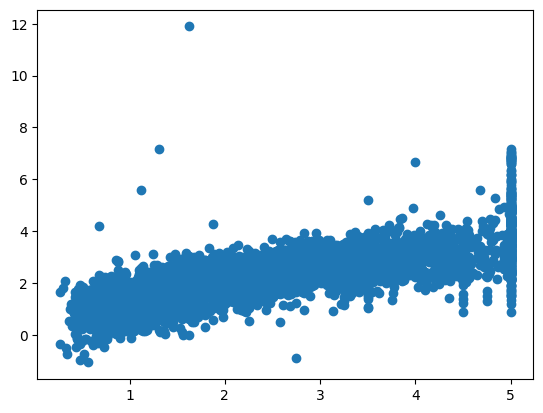

In [42]:
### Assumptions for it 
plt.scatter(y_test,y_pred_test)

In [43]:
residuals = y_test - y_pred_test


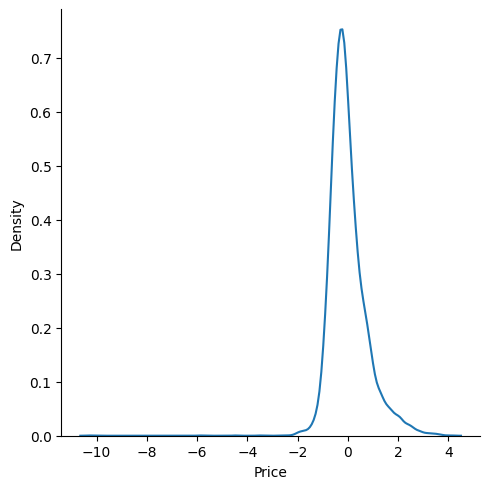

In [44]:
sns.displot(residuals,kind = 'kde')

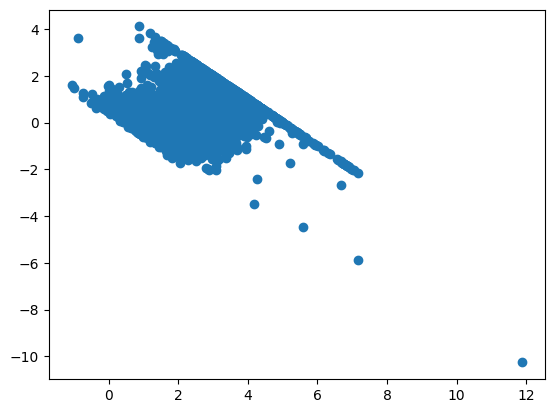

In [45]:
plt.scatter(y_pred_test,residuals)

# Lasso Regression Model learning

In [46]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [47]:
lasso.fit(x_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [48]:
y_pred_lasso_train = lasso.predict(x_train_scaled)

In [49]:
y_pred_lasso_test = lasso.predict(x_test_scaled)

In [50]:
##3 see the coeffients and intercept 
lasso.coef_
print("Intercept  : ",lasso.intercept_)

Intercept  :  2.063476808649118


## Performance metrics

In [51]:
mse = mean_squared_error(y_test,y_pred_lasso_test) ### mse for test data 
mae = mean_absolute_error(y_test,y_pred_lasso_test) ### mae for the test data
rmse = np.sqrt(mse) ### rmse
score = r2_score(y_test,y_pred_lasso_test)

In [52]:
print("mean squared error is : ",mse)
print("mean absolute error is : ",mae)
print("root mean squared error is : ",rmse)
print("r2 score is  : ",score)

mean squared error is :  1.359064811340808
mean absolute error is :  0.921173027224541
root mean squared error is :  1.1657893511869148
r2 score is  :  -0.00017444788113429865


## Assumptions

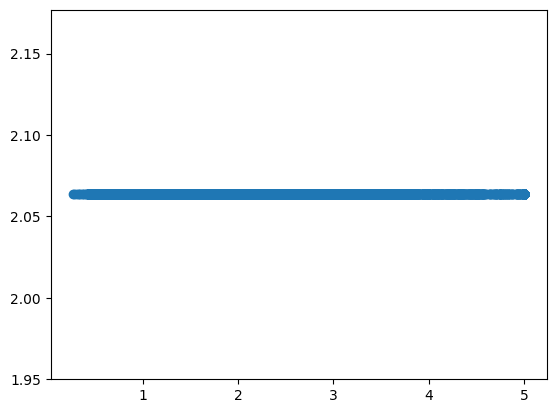

In [53]:
plt.scatter(y_test,y_pred_lasso_test)

# Ridge Regression Model learning


In [54]:
from sklearn.linear_model  import Ridge

In [55]:
ridge = Ridge()

In [56]:
ridge.fit(x_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [57]:
y_pred_ridge_test = ridge.predict(x_test_scaled)

In [58]:
ridge.coef_

array([ 0.82868215,  0.12321405, -0.27048773,  0.32831913,  0.00216746,
       -0.02811351, -0.9292008 , -0.89406757])

In [59]:
ridge.intercept_

np.float64(2.0634768086491158)

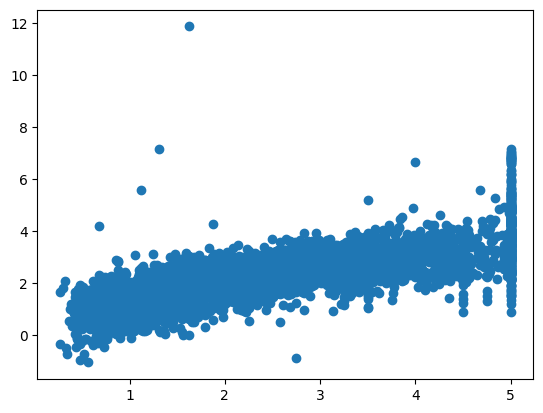

In [60]:
plt.scatter(y_test,y_pred_ridge_test)


In [61]:
mse = mean_squared_error(y_test,y_pred_ridge_test) ### mse for test data 
mae = mean_absolute_error(y_test,y_pred_ridge_test) ### mae for the test data
rmse = np.sqrt(mse) ### rmse
score = r2_score(y_test,y_pred_ridge_test)

In [62]:
print("mean squared error is : ",mse)
print("mean absolute error is : ",mae)
print("root mean squared error is : ",rmse)
print("r2 score is  : ",score)

mean squared error is :  0.5521963738838722
mean absolute error is :  0.5370902303675105
root mean squared error is :  0.7430991682702062
r2 score is  :  0.5936229834201999


# ElasticNet Regression model

In [63]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [64]:
elastic.fit(x_train_scaled,y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [65]:
y_pred_elastic_test = elastic.predict(x_test_scaled)

In [66]:
mse = mean_squared_error(y_test,y_pred_elastic_test) ### mse for test data 
mae = mean_absolute_error(y_test,y_pred_elastic_test) ### mae for the test data
rmse = np.sqrt(mse) ### rmse
score = r2_score(y_test,y_pred_elastic_test)

In [67]:
print("mean squared error is : ",mse)
print("mean absolute error is : ",mae)
print("root mean squared error is : ",rmse)
print("r2 score is  : ",score)

mean squared error is :  1.0815256872019192
mean absolute error is :  0.8213295416079792
root mean squared error is :  1.0399642720795361
r2 score is  :  0.2040744870737542


# Pickling the machine learning model 


In [68]:
import pickle

In [69]:
pickle.dump(regressor,open('regmodel.pkl','wb'))

In [70]:
pickle.dump(scaler,open('scaler.pkl','wb'))